In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pickle


with open('../input/kaggle-competitions-download-c-cse151bspring/new_train/new_train/0.pkl', 'rb') as f:
    data = pickle.load(f)

In [24]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy as np
import pickle
from glob import glob

"""Change to the data folder"""
new_path = "../input/kaggle-competitions-download-c-cse151bspring/new_train/new_train/"

# number of sequences in each dataset
# train:205942  val:3200 test: 36272 
# sequences sampled at 10HZ rate

In [3]:
class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, data_path: str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.data_path = data_path
        self.transform = transform

        self.pkl_list = glob(os.path.join(self.data_path, '*'))
        self.pkl_list.sort()
        
    def __len__(self):
        return len(self.pkl_list)

    def __getitem__(self, idx):

        pkl_path = self.pkl_list[idx]
        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
            
        if self.transform:
            data = self.transform(data)

        return data


# intialize a dataset
val_dataset  = ArgoverseDataset(data_path=new_path)

In [4]:
with open('../input/kaggle-competitions-download-c-cse151bspring/new_train/new_train/0.pkl', 'rb') as f:
    data = pickle.load(f)

In [5]:
data

{'city': 'PIT',
 'lane': array([[3278.8716, 1968.7596,    0.    ],
        [3282.6606, 1972.2533,    0.    ],
        [3286.4429, 1975.7545,    0.    ],
        [3290.2249, 1979.2559,    0.    ],
        [3294.007 , 1982.7572,    0.    ],
        [3297.789 , 1986.2584,    0.    ],
        [3301.5713, 1989.7598,    0.    ],
        [3305.3533, 1993.2611,    0.    ],
        [3309.1355, 1996.7623,    0.    ],
        [3269.4802, 1967.0625,    0.    ],
        [3267.2764, 1965.0217,    0.    ],
        [3265.0664, 1962.9877,    0.    ],
        [3262.8562, 1960.9536,    0.    ],
        [3260.646 , 1958.9197,    0.    ],
        [3258.436 , 1956.8856,    0.    ],
        [3256.2258, 1954.8517,    0.    ],
        [3254.0132, 1952.8207,    0.    ],
        [3251.7898, 1950.8013,    0.    ],
        [3235.7622, 1935.9915,    0.    ],
        [3231.5237, 1932.1249,    0.    ],
        [3227.2852, 1928.2582,    0.    ],
        [3223.0923, 1924.343 ,    0.    ],
        [3218.9045, 1920.4214,

> # Part 1: Task Description and Exploratory Analysis

In [10]:
data['']

{'city': 'PIT',
 'lane': array([[3278.8716, 1968.7596,    0.    ],
        [3282.6606, 1972.2533,    0.    ],
        [3286.4429, 1975.7545,    0.    ],
        [3290.2249, 1979.2559,    0.    ],
        [3294.007 , 1982.7572,    0.    ],
        [3297.789 , 1986.2584,    0.    ],
        [3301.5713, 1989.7598,    0.    ],
        [3305.3533, 1993.2611,    0.    ],
        [3309.1355, 1996.7623,    0.    ],
        [3269.4802, 1967.0625,    0.    ],
        [3267.2764, 1965.0217,    0.    ],
        [3265.0664, 1962.9877,    0.    ],
        [3262.8562, 1960.9536,    0.    ],
        [3260.646 , 1958.9197,    0.    ],
        [3258.436 , 1956.8856,    0.    ],
        [3256.2258, 1954.8517,    0.    ],
        [3254.0132, 1952.8207,    0.    ],
        [3251.7898, 1950.8013,    0.    ],
        [3235.7622, 1935.9915,    0.    ],
        [3231.5237, 1932.1249,    0.    ],
        [3227.2852, 1928.2582,    0.    ],
        [3223.0923, 1924.343 ,    0.    ],
        [3218.9045, 1920.4214,

In [20]:
data['p_in'][0][:,1]

array([1947.62609863, 1947.62597656, 1947.62585449, 1947.62597656,
       1947.62561035, 1947.62561035, 1947.62548828, 1947.62573242,
       1947.62573242, 1947.62573242, 1947.62561035, 1947.62573242,
       1947.62585449, 1947.62597656, 1947.62585449, 1947.62585449,
       1947.62561035, 1947.62573242, 1947.62585449])

### Position Input for all Agents

Text(0.5, 1.0, 'X axis Input Position for all input agents')

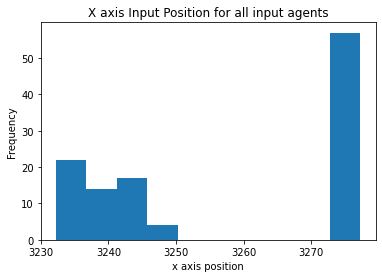

In [32]:
x_position_in = np.reshape(data['p_in'][:,:,0], 60*19)
y_position_in = np.reshape(data['p_in'][:,:,1], 60*19)

plt.hist(x_position_in[x_position_in != 0])
plt.xlabel('x axis position')
plt.ylabel('Frequency')
plt.title('X axis Input Position for all agents')

Text(0.5, 1.0, 'Y axis Input Position for all input agents')

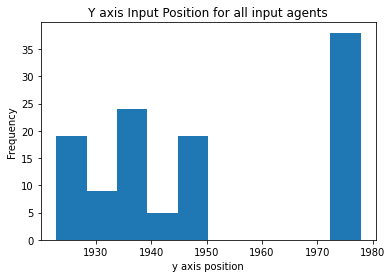

In [33]:
plt.hist(y_position_in[x_position_in != 0])
plt.xlabel('y axis position')
plt.ylabel('Frequency')
plt.title('Y axis Input Position for all agents')

## Position Output for all agents

Text(0.5, 1.0, 'X axis Output Position for all input agents')

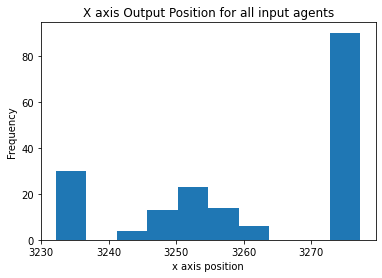

In [36]:
x_position_out = np.reshape(data['p_out'][:,:,0], 60*30)
y_position_out = np.reshape(data['p_out'][:,:,1], 60*30)

plt.hist(x_position_out[x_position_out != 0])
plt.xlabel('x axis position')
plt.ylabel('Frequency')
plt.title('X axis Output Position for all agents')

Text(0.5, 1.0, 'Y axis Output Position for all agents')

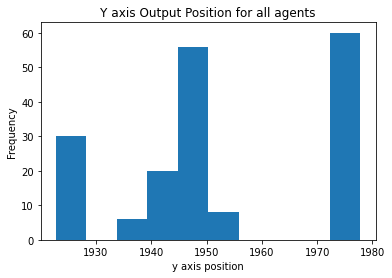

In [37]:
plt.hist(y_position_out[y_position_out != 0])
plt.xlabel('y axis position')
plt.ylabel('Frequency')
plt.title('Y axis Output Position for all agents')

## Velocity Input for all agents

Text(0.5, 1.0, 'X axis Input Velocity for all agents')

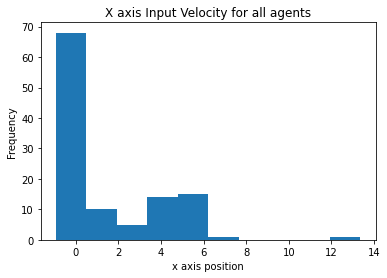

In [40]:
x_velocity_in = np.reshape(data['v_in'][:,:,0], 60*19)
y_velocity_in = np.reshape(data['v_in'][:,:,1], 60*19)

plt.hist(x_velocity_in[x_velocity_in != 0])
plt.xlabel('x axis position')
plt.ylabel('Frequency')
plt.title('X axis Input Velocity for all agents')

Text(0.5, 1.0, 'Y axis Input Velocity for all agents')

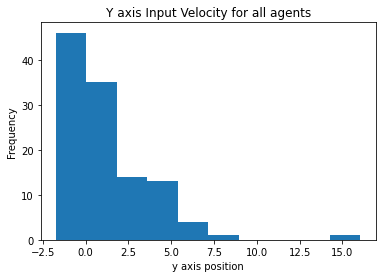

In [41]:
plt.hist(y_velocity_in[y_velocity_in != 0])
plt.xlabel('y axis position')
plt.ylabel('Frequency')
plt.title('Y axis Input Velocity for all agents')

## Velocity Output for all agents

Text(0.5, 1.0, 'Y axis Input Velocity for all agents')

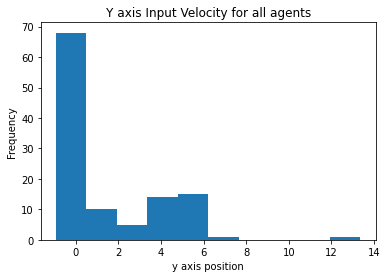

In [43]:
x_velocity_out = np.reshape(data['v_out'][:,:,0], 60*30)
y_velocity_out = np.reshape(data['v_out'][:,:,1], 60*30)

plt.hist(x_velocity_in[x_velocity_in != 0])
plt.xlabel('y axis position')
plt.ylabel('Frequency')
plt.title('Y axis Input Velocity for all agents')

In [51]:
len(data['lane_norm'])

72

In [6]:
batch_sz = 4

def my_collate(batch):
    """ collate lists of samples into batches, create [ batch_sz x agent_sz x seq_len x feature] """
    inp = [numpy.dstack([scene['p_in'], scene['v_in']]) for scene in batch]
    out = [numpy.dstack([scene['p_out'], scene['v_out']]) for scene in batch]
    inp = torch.LongTensor(inp)
    out = torch.LongTensor(out)
    return [inp, out]

val_loader = DataLoader(val_dataset,batch_size=batch_sz, shuffle = False, collate_fn=my_collate, num_workers=0)

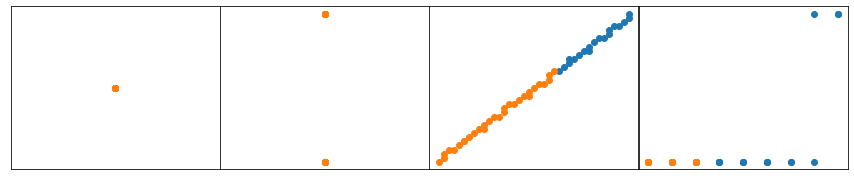

In [7]:
import matplotlib.pyplot as plt
import random

agent_id = 0

def show_sample_batch(sample_batch, agent_id):
    """visualize the trajectory for a batch of samples with a randon agent"""
    inp, out = sample_batch
    batch_sz = inp.size(0)
    agent_sz = inp.size(1)
    
    fig, axs = plt.subplots(1,batch_sz, figsize=(15, 3), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()   
    for i in range(batch_sz):
        axs[i].xaxis.set_ticks([])
        axs[i].yaxis.set_ticks([])
        
        # first two feature dimensions are (x,y) positions
        axs[i].scatter(inp[i, agent_id,:,0], inp[i, agent_id,:,1])
        axs[i].scatter(out[i, agent_id,:,0], out[i, agent_id,:,1])

        
for i_batch, sample_batch in enumerate(val_loader):
    inp, out = sample_batch
    """TODO:
      Deep learning model
      training routine
    """
    show_sample_batch(sample_batch, agent_id)
    break